In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
act_blizzard_df = pd.read_csv('act_act_blizzard.csv')
act_blizzard_df.dropna()

,Date,TICKER,Open,High,Low,Close,Volume,Currency
0,2010-01-04,ATVI,11.23,11.45,11.15,11.30,9310055,USD
1,2010-01-05,ATVI,11.24,11.36,11.21,11.32,11370203,USD
2,2010-01-06,ATVI,11.26,11.38,11.21,11.26,6541811,USD
3,2010-01-07,ATVI,11.10,11.19,10.93,10.99,15392067,USD
4,2010-01-08,ATVI,10.97,11.05,10.88,10.90,11003838,USD
...,...,...,...,...,...,...,...,...
3186,2022-08-29,ATVI,78.55,79.08,78.50,78.75,3657033,USD
3187,2022-08-30,ATVI,78.83,78.94,78.47,78.62,3075012,USD
3188,2022-08-31,ATVI,79.06,79.07,78.49,78.49,4108374,USD
3189,2022-09-01,ATVI,78.36,79.00,78.10,78.55,4818317,USD


In [3]:
act_blizzard_df['Date'] = pd.to_datetime(act_blizzard_df['Date'])

In [4]:
act_blizzard_df = act_blizzard_df.sort_values(by='Date')

In [5]:
X = act_blizzard_df[['Open']]
y = act_blizzard_df['Close']

In [6]:
model = LinearRegression()

In [7]:
model.fit(X, y)

LinearRegression()

In [8]:
future_dates = pd.date_range(start=act_blizzard_df['Date'].iloc[-1], periods=365, freq='D')

In [9]:
future_df = pd.DataFrame({'Open': np.nan}, index=future_dates)

In [10]:
future_df['Close'] = model.predict(future_df[['Open']])

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [11]:
combined_df = pd.concat([act_blizzard_df, future_df])

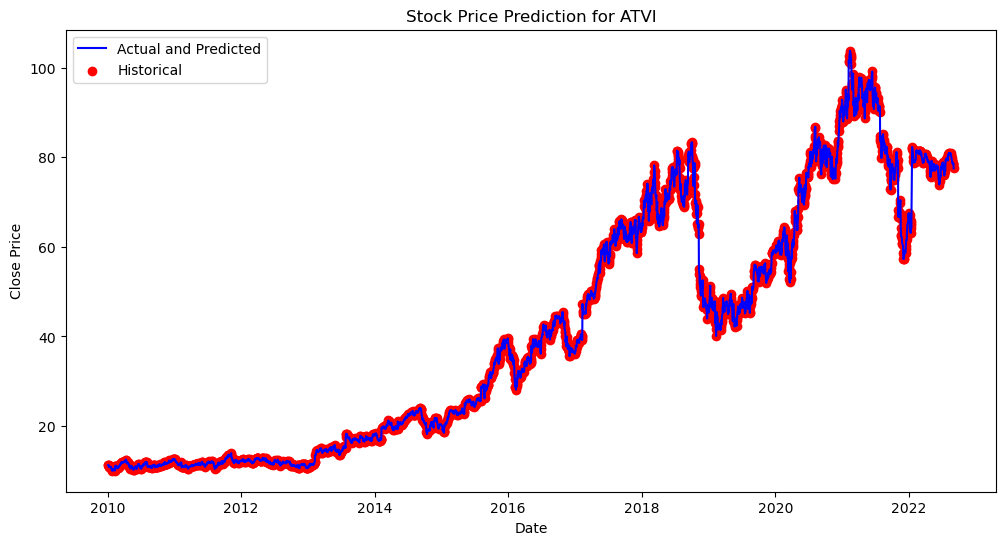

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Close'], label='Actual and Predicted', color='blue')
plt.scatter(act_blizzard_df['Date'], act_blizzard_df['Close'], color='red', label='Historical', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction for ATVI')
plt.legend()
plt.show()